# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
PassiveLearningRF = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "_PL0.0")
RandomForestResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "0.0")
AnalyzedData005 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.005)
AnalyzedData010 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.01)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData020 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.02)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)
# AnalyzedData030 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.03)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData010["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData020["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0]
                        # AnalyzedData030["Error_DUREAL"].shape[0]
                        ],
              "UNREAL": [AnalyzedData010["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0], 
                         AnalyzedData020["Error_UNREAL"].shape[0],
                         AnalyzedData025["Error_UNREAL"].shape[0]
                        #  AnalyzedData030["Error_UNREAL"].shape[0]
                         ]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(10,30,5)
ShapeTable

,DUREAL,UNREAL
10,99,100
15,99,100
20,99,100
25,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2))
                        # str(round(np.mean(AnalyzedData030["Time_DUREAL"])/60,2))
                        ],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData020["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2))
                        #  str(round(np.mean(AnalyzedData030["Time_UNREAL"])/60,2))
                         ],
                "DUREAL max":[str(round(np.max(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2))
                        # str(round(np.max(AnalyzedData030["Time_DUREAL"])/60,2))
                        ],
              "UNREAL max": [str(round(np.max(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData020["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2))
                        #  str(round(np.max(AnalyzedData030["Time_UNREAL"])/60,2))
                         ]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(10,30,5)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
10,0.61,0.63,6.56,4.62
15,2.66,2.97,25.42,55.7
20,6.08,6.03,55.16,51.99
25,20.42,23.67,169.35,372.81


In [5]:
372/60

6.2

# Error Vec

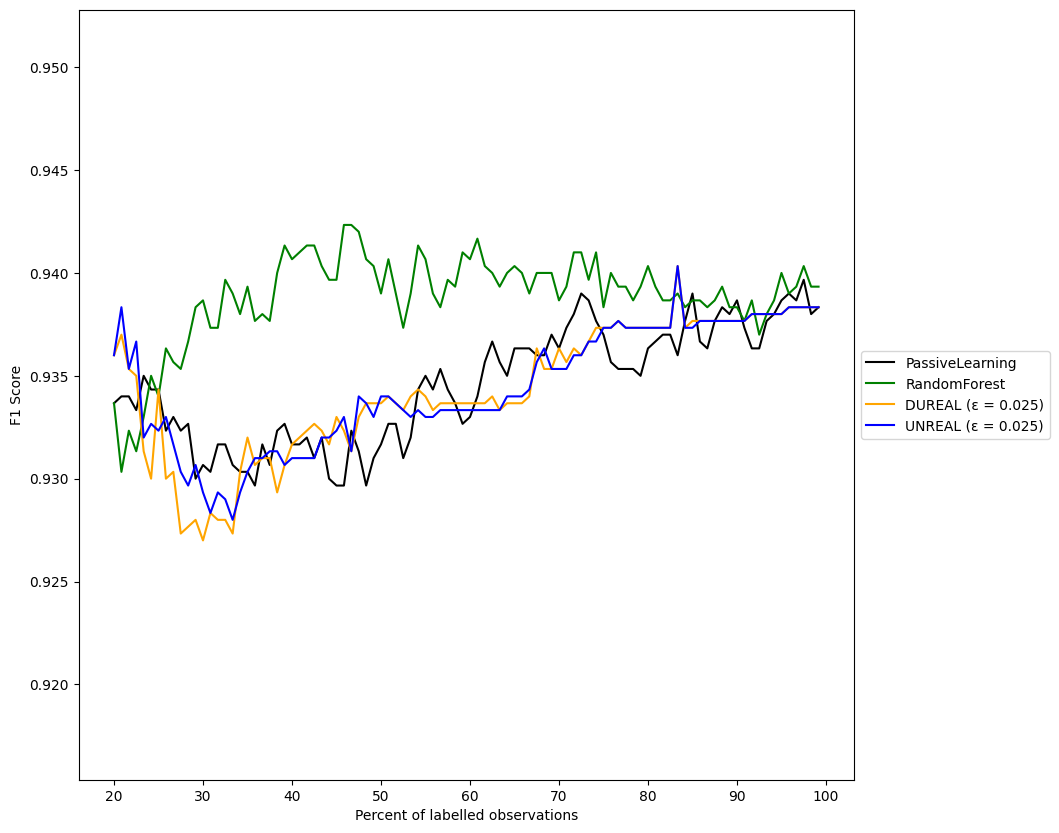

In [6]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData010['Error_DUREAL'].shape[0]}"
colors = {
    "PassiveLearning": "black",
    "RandomForest": "green",
    "DUREAL010": "orange",
    "UNREAL010": "blue",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL020": "orange",
    "UNREAL020": "blue",
    "DUREAL025": "orange",
    "UNREAL025": "blue",
    "DUREAL30": "orange",
    "UNREAL30": "blue"
}

linestyles = {
    "PassiveLearning": "solid",
    "RandomForest": "solid",
    "DUREAL010": "dashed",
    "UNREAL010": "dashed",
    "DUREAL015": "dotted",
    "UNREAL015": "dotted",
    "DUREAL020": "dotted",
    "UNREAL020": "dotted",
    "DUREAL025": "solid",
    "UNREAL025": "solid"
}

# markerstyles = {
#     "RandomForest": "^",
#     "DUREAL010": "^",
#     "UNREAL010": "^",
#     "DUREAL015": "^",
#     "UNREAL015": "^",
#     "DUREAL020": "^",
#     "UNREAL020": "^",
#     "DUREAL025": "^",
#     "UNREAL025": "^"
# }

LegendMapping = {
    "DUREAL010": "DUREAL (ε = 0.010)",
    "UNREAL010": "UNREAL (ε = 0.010)",
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL020": "DUREAL (ε = 0.020)",
    "UNREAL020": "UNREAL (ε = 0.020)",
    "DUREAL025": "DUREAL (ε = 0.025)",
    "UNREAL025": "UNREAL (ε = 0.025)",
    "DUREAL030": "DUREAL (ε = 0.030)",
    "UNREAL030": "UNREAL (ε = 0.030)"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 PassiveLearning = PassiveLearningRF["Error_RF"],
                 RandomForest = RandomForestResults["Error_RF"],
                #  DUREAL010 = AnalyzedData010["Error_DUREAL"],
                #  UNREAL010 = AnalyzedData010["Error_UNREAL"],
                #  DUREAL015 = AnalyzedData015["Error_DUREAL"],
                #  UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL020 = AnalyzedData020["Error_DUREAL"],
                #  UNREAL020 = AnalyzedData020["Error_UNREAL"],
                 DUREAL025 = AnalyzedData025["Error_DUREAL"],
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],
                #  DUREAL030 = AnalyzedData030["Error_DUREAL"],
                #  UNREAL030 = AnalyzedData030["Error_UNREAL"],
                 Colors = colors,
                LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                #  Markerstyles = markerstyles,
                # xlim = [20,25],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 FigSize = (10,10),
                 CriticalValue = 1.96)

# Wilcoxon Ranked Signed Test

In [7]:
WRSTResults = WilcoxonRankSignedTest({"PassiveLearning" :PassiveLearningRF["Error_RF"],
                        "RandomForest" : RandomForestResults["Error_RF"],
                        "UNREAL010" : AnalyzedData010["Error_UNREAL"],
                        "DUREAL015" : AnalyzedData015["Error_DUREAL"],
                        "UNREAL015" : AnalyzedData015["Error_UNREAL"],
                        "DUREAL020" : AnalyzedData020["Error_DUREAL"],
                        "UNREAL020" : AnalyzedData020["Error_UNREAL"],
                        "DUREAL025" : AnalyzedData025["Error_DUREAL"],
                        "UNREAL025" : AnalyzedData025["Error_UNREAL"]},
                        5)

WRSTResults_LatexTable = WRSTResults.to_latex()
print(WRSTResults_LatexTable)

\begin{tabular}{llllllllll}
\toprule
 & PassiveLearning & RandomForest & UNREAL010 & DUREAL015 & UNREAL015 & DUREAL020 & UNREAL020 & DUREAL025 & UNREAL025 \\
\midrule
PassiveLearning & 1.0 &  &  &  &  &  &  &  &  \\
RandomForest & 0.0 & 1.0 &  &  &  &  &  &  &  \\
UNREAL010 & 0.0 & 0.0 & 1.0 &  &  &  &  &  &  \\
DUREAL015 & 0.0 & 0.0 & 0.00055 & 1.0 &  &  &  &  &  \\
UNREAL015 & 0.0 & 0.0 & 0.0 & 0.94755 & 1.0 &  &  &  &  \\
DUREAL020 & 0.62695 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0 &  &  &  \\
UNREAL020 & 0.45029 & 0.0 & 0.0 & 2e-05 & 3e-05 & 0.34389 & 1.0 &  &  \\
DUREAL025 & 0.54872 & 0.0 & 0.0 & 0.0 & 0.0 & 0.69039 & 0.67623 & 1.0 &  \\
UNREAL025 & 0.50544 & 0.0 & 0.0 & 0.0 & 0.0 & 0.88929 & 0.41712 & 0.82624 & 1.0 \\
\bottomrule
\end{tabular}



# Input

In [8]:
AnalyzedDataSmall = AnalyzedData010
AnalyzedDataLarge = AnalyzedData025

# Selection History

In [9]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForestResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
326,3.625000,1,1,0,1,1,1,0,1,0,0,1
455,4.250000,1,0,0,0,1,1,0,0,1,0,1
72,5.428571,0,0,0,0,0,1,1,0,0,0,0
288,5.444444,0,1,0,0,1,0,0,0,0,1,1
590,5.692308,0,0,1,0,0,0,1,0,1,0,1


# Tree Counts

In [10]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

In [11]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 1)

# Number of All Trees

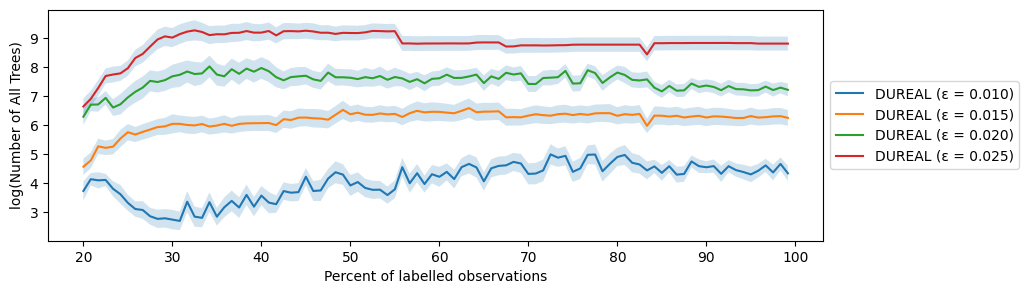

In [12]:
### Line Styles ###
linestyles = {"DUREAL005" : "solid",
"DUREAL010" : "solid",
"DUREAL015" : "solid",
"DUREAL020" : "solid",
"DUREAL025" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL010 = np.log(AnalyzedData010["TreeCounts_ALL_UNREAL"]),
                 DUREAL015 = np.log(AnalyzedData015["TreeCounts_ALL_UNREAL"]),
                 DUREAL020 = np.log(AnalyzedData020["TreeCounts_ALL_UNREAL"]),
                 DUREAL025 = np.log(AnalyzedData025["TreeCounts_ALL_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of All Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.2,
                 VarInput = False,
                 CriticalValue = 1.96)

## Number of Unique Trees

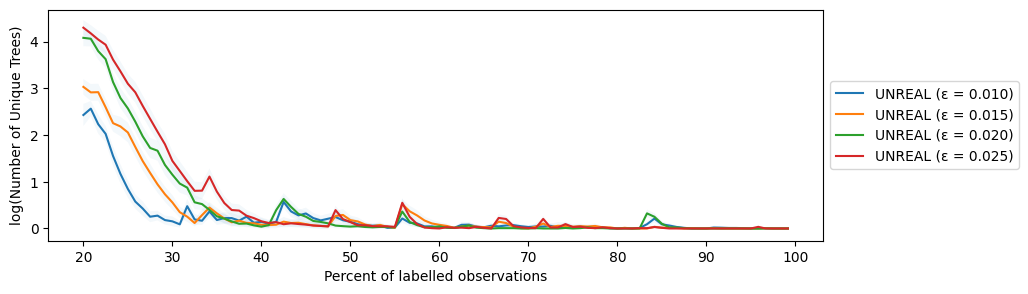

In [13]:
### Linetype ###
linestyles = {"UNREAL010" : "solid",
"UNREAL015" : "solid",
"UNREAL020" : "solid",
"UNREAL025" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 UNREAL010 = np.log(AnalyzedData010["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL015 = np.log(AnalyzedData015["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL020 = np.log(AnalyzedData020["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL025 = np.log(AnalyzedData025["TreeCounts_UNIQUE_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of Unique Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 VarInput = False,
                 CriticalValue = 1.96)